<a href="https://colab.research.google.com/github/felipesora/CP1-Analise-Dados-Consumidores-Energia/blob/main/CP1_Analise_Dados_Consumidores_Energia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Checkpoint 01: Análise de Dados de Consumidores de Energia**

Felipe Ulson Sora - RM555462

## PARTE 1 – Exercícios iniciais com Individual Household Electric Power Consumption

Link para download do conjunto de dados:
https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption

1. Carregue o dataset e exiba as 10 primeiras linhas.

In [2]:
import pandas as pd

df = pd.read_csv('/content/household_power_consumption.txt', sep=';', low_memory=False)
df.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


2. Explique a diferença entre as variáveis Global_active_power e Global_reactive_power.

Global_active_power

- O que é: É a potência ativa total consumida por todos os aparelhos elétricos de uma residência ou instalação em determinado momento.

- Unidade: Geralmente em kilowatts (kW).

- Função na prática: Representa a energia que efetivamente realiza trabalho (como acender lâmpadas, ligar o chuveiro, rodar a geladeira).

- Exemplo: Se você liga um chuveiro de 2 kW e uma lâmpada de 0,1 kW, a Global_active_power mede a soma, ou seja, 2,1 kW de potência sendo usada de fato.

Global_reactive_power

- O que é: É a potência reativa total, ou seja, a energia que não realiza trabalho útil, mas que é necessária para o funcionamento de equipamentos que usam campos magnéticos, como motores, transformadores e condensadores.

- Unidade: Geralmente em kilovolt-ampere reativo (kVAR).

- Função na prática: Mantém os campos elétricos e magnéticos dentro dos aparelhos; embora não seja usada diretamente para produzir trabalho, é fundamental para o funcionamento de certos equipamentos.

- Exemplo: Um motor de geladeira consome 0,2 kW de potência reativa enquanto está ligado, para gerar o campo magnético que faz o motor girar.

Conclusão:

- Potência ativa (Global_active_power): gera trabalho útil.

- Potência reativa (Global_reactive_power): mantém os campos elétricos/magnéticos necessários, mas não realiza trabalho direto.

3. Verifique se existem valores ausentes no dataset. Quantifique-os.

In [3]:
df.isnull().sum()

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,25979


4. Converta a coluna Date para o tipo datetime e crie uma nova coluna com o dia da semana
correspondente.

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day_of_Week'] = df['Date'].dt.day_name()
df.head()

/tmp/ipython-input-2254452357.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day_of_Week
0,2006-12-16,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,Saturday
1,2006-12-16,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,Saturday
2,2006-12-16,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,Saturday
3,2006-12-16,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,Saturday
4,2006-12-16,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,Saturday


5. Filtre os registros apenas do ano de 2007 e calcule a média de consumo diário de Global_active_power.

In [5]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df_2007 = df[df['Date'].dt.year == 2007]
consumo_diario_medio = df_2007['Global_active_power'].mean()
print(f'A média de consumo diário de Global_active_power no ano de 2007 é de {consumo_diario_medio} kW.')

A média de consumo diário de Global_active_power no ano de 2007 é de 1.117007500924916 kW.


6. Gere um gráfico de linha mostrando a variação de Global_active_power em um único dia à sua escolha.

<Axes: xlabel='Time'>

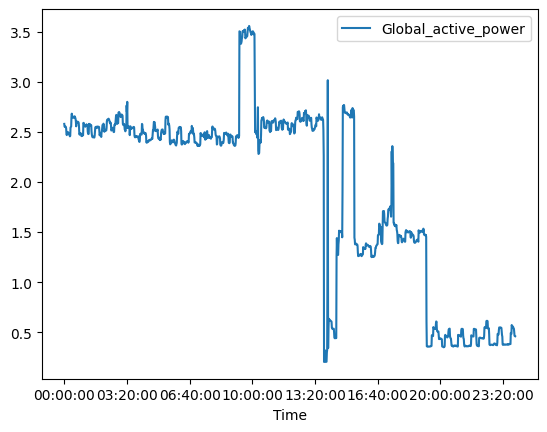

In [6]:
dia_escolhido = '2007-01-01'
df_dia_escolhido = df[df['Date'] == dia_escolhido]
df_dia_escolhido.plot(x='Time', y='Global_active_power', kind='line')

7. Crie um histograma da variável Voltage. O que pode ser observado sobre sua distribuição?


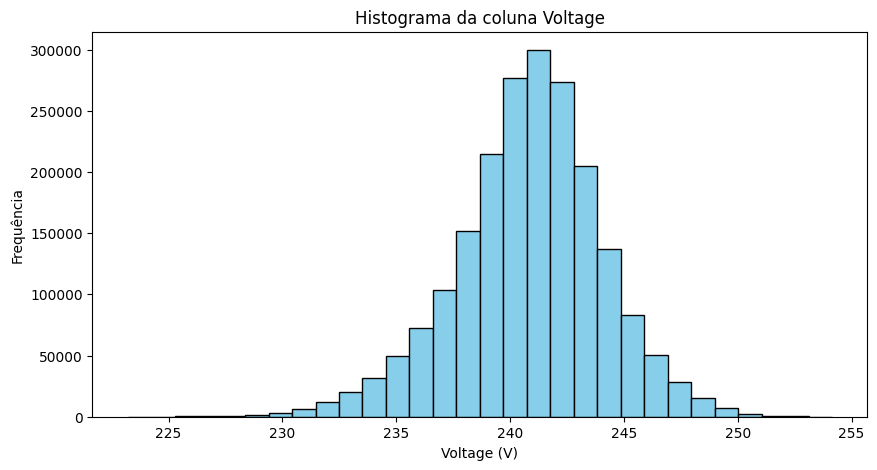

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Converte a coluna Voltage para numérico (valores inválidos viram NaN)
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')

# Opcional: filtra só linhas válidas
df_volt = df[df['Voltage'].notna()]

# Cria o histograma
plt.figure(figsize=(10,5))
plt.hist(df_volt['Voltage'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma da coluna Voltage')
plt.xlabel('Voltage (V)')
plt.ylabel('Frequência')
plt.show()

O histograma da variável Voltage, indica que a maioria dos valores de voltagem se concentra em torno de uma média, com a frequência diminuindo gradualmente à medida que os valores se afastam dessa média em ambas as direções. A distribuição parece ser simétrica, com picos e vales distribuídos de forma relativamente uniforme em torno do valor central.

8. Calcule o consumo médio por mês em todo o período disponível no dataset.

In [8]:
df['Month_Year'] = df['Date'].dt.to_period('M')
consumo_medio_por_mes = df.groupby('Month_Year')['Global_active_power'].mean()
print("Consumo médio de Global_active_power por mês:")
print(consumo_medio_por_mes)

Consumo médio de Global_active_power por mês:
Month_Year
2006-12    1.901295
2007-01    1.546034
2007-02    1.401084
2007-03    1.318627
2007-04    0.891189
2007-05    0.985862
2007-06    0.826814
2007-07    0.667367
2007-08    0.764186
2007-09    0.969318
2007-10    1.103911
2007-11    1.294473
2007-12    1.626474
2008-01    1.459920
2008-02    1.181384
2008-03    1.245337
2008-04    1.115972
2008-05    1.024281
2008-06    0.994096
2008-07    0.794781
2008-08    0.276488
2008-09    0.987680
2008-10    1.136768
2008-11    1.387066
2008-12    1.275189
2009-01    1.410202
2009-02    1.247568
2009-03    1.226735
2009-04    1.140690
2009-05    1.012856
2009-06    0.840756
2009-07    0.618121
2009-08    0.664619
2009-09    0.986841
2009-10    1.144486
2009-11    1.274743
2009-12    1.364421
2010-01    1.430525
2010-02    1.375855
2010-03    1.130075
2010-04    1.027295
2010-05    1.095284
2010-06    0.969615
2010-07    0.721068
2010-08    0.590778
2010-09    0.956442
2010-10    1.163399
201

9. Identifique o dia com maior consumo de energia ativa global (Global_active_power).

In [9]:
dia_maior_consumo = df.loc[df['Global_active_power'].idxmax(), 'Date']
print(f'O dia com maior consumo de energia ativa global é {dia_maior_consumo}.')

O dia com maior consumo de energia ativa global é 2009-02-22 00:00:00.


10. Compare o consumo médio de energia ativa global em dias de semana versus finais de semana.

In [10]:
# Compare o consumo médio de energia ativa global em dias de semana versus finais de semana.
consumo_medio_por_dia = df.groupby('Day_of_Week')['Global_active_power'].mean()
print("Consumo médio de Global_active_power por dia da semana:")
print(consumo_medio_por_dia)

Consumo médio de Global_active_power por dia da semana:
Day_of_Week
Friday       1.043394
Monday       0.999546
Saturday     1.248335
Sunday       1.220188
Thursday     0.981809
Tuesday      1.069796
Wednesday    1.082588
Name: Global_active_power, dtype: float64


11. Calcule a correlação entre as variáveis Global_active_power, Global_reactive_power, Voltage e Global_intensity.

In [11]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')

correlacoes = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].corr()
print("Correlações entre as variáveis:")
print(correlacoes)

Correlações entre as variáveis:
                       Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000               0.247017 -0.399762   
Global_reactive_power             0.247017               1.000000 -0.112246   
Voltage                          -0.399762              -0.112246  1.000000   
Global_intensity                  0.998889               0.266120 -0.411363   

                       Global_intensity  
Global_active_power            0.998889  
Global_reactive_power          0.266120  
Voltage                       -0.411363  
Global_intensity               1.000000  


12. Crie uma nova variável chamada Total_Sub_metering que some Sub_metering_1,
Sub_metering_2 e Sub_metering_3.

In [12]:
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')
df['Sub_metering_3'] = pd.to_numeric(df['Sub_metering_3'], errors='coerce')

df['Total_Sub_metering'] = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']
df['Total_Sub_metering'].head()

,Total_Sub_metering
0,18.0
1,17.0
2,19.0
3,18.0
4,18.0


13. Verifique se há algum mês em que Total_Sub_metering ultrapassa a média de
Global_active_power.

In [13]:
media_global_active_power = df['Global_active_power'].mean()
df_acima_media = df[df['Total_Sub_metering'] > media_global_active_power]
df_acima_media

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day_of_Week,Month_Year,Total_Sub_metering
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,Saturday,2006-12,18.0
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,Saturday,2006-12,17.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,Saturday,2006-12,19.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,Saturday,2006-12,18.0
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,Saturday,2006-12,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2075217,2010-11-26,20:21:00,1.086,0.140,240.59,4.6,0.0,2.0,0.0,Friday,2010-11,2.0
2075222,2010-11-26,20:26:00,1.074,0.134,239.71,4.6,0.0,2.0,0.0,Friday,2010-11,2.0
2075227,2010-11-26,20:31:00,0.982,0.000,239.33,4.2,0.0,2.0,0.0,Friday,2010-11,2.0
2075234,2010-11-26,20:38:00,0.976,0.096,236.97,4.0,0.0,2.0,0.0,Friday,2010-11,2.0


14. Faça um gráfico de série temporal do Voltage para o ano de 2008.

<Axes: xlabel='Date'>

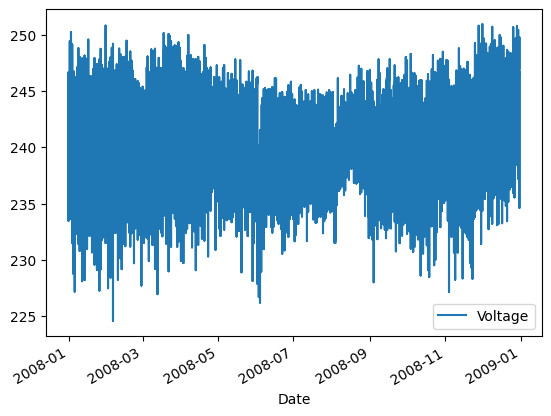

In [14]:
df_2008 = df[df['Date'].dt.year == 2008]
df_2008.plot(x='Date', y='Voltage', kind='line')

15. Compare o consumo entre os meses de verão e inverno (no hemisfério norte).

In [15]:
consumo_por_mes = df.groupby(df['Date'].dt.month)['Global_active_power'].mean()
print("Consumo médio de Global_active_power por mês:")
print(consumo_por_mes)

Consumo médio de Global_active_power por mês:
Date
1     1.462226
2     1.300431
3     1.231343
4     1.047146
5     1.029571
6     0.909148
7     0.700359
8     0.572812
9     0.975653
10    1.137141
11    1.291532
12    1.489729
Name: Global_active_power, dtype: float64


16. Aplique uma amostragem aleatória de 1% dos dados e verifique se a distribuição de Global_active_power é semelhante à da base completa.

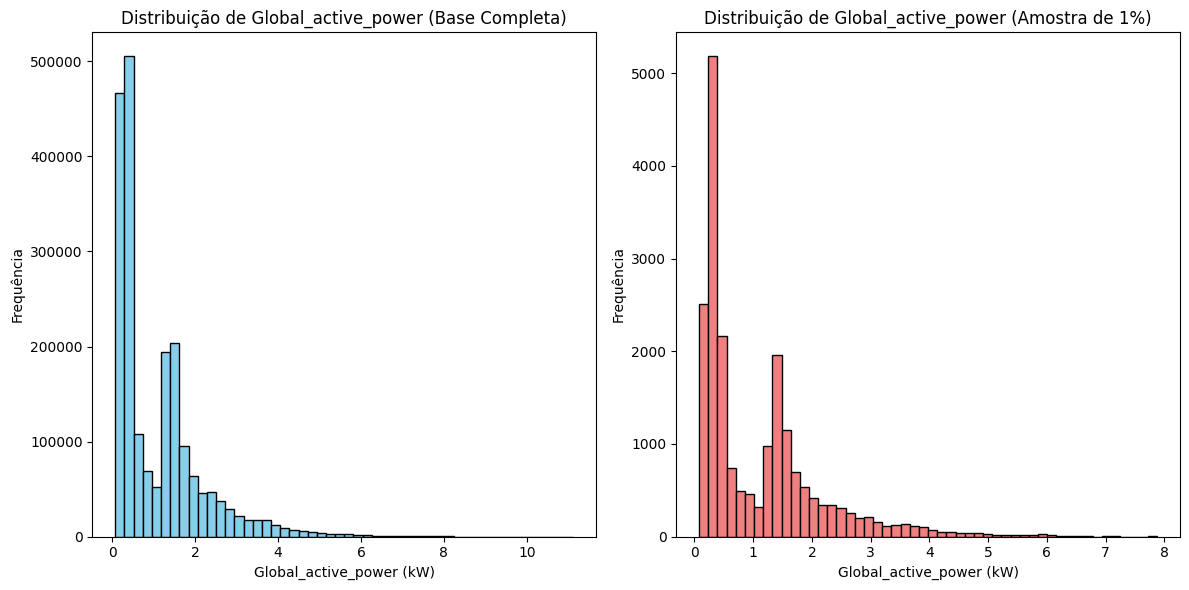

In [16]:
df_sampled = df.sample(frac=0.01, random_state=42)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['Global_active_power'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('Distribuição de Global_active_power (Base Completa)')
plt.xlabel('Global_active_power (kW)')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
plt.hist(df_sampled['Global_active_power'].dropna(), bins=50, color='lightcoral', edgecolor='black')
plt.title('Distribuição de Global_active_power (Amostra de 1%)')
plt.xlabel('Global_active_power (kW)')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

17. Utilize uma técnica de normalização (Min-Max Scaling) para padronizar as variáveis numéricas principais.

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Select the numerical columns to normalize
numerical_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Total_Sub_metering']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the selected columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

display(df.head())

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day_of_Week,Month_Year,Total_Sub_metering
0,2006-12-16,17:24:00,0.374796,0.300719,0.376090,0.377593,0.0,0.0125,0.548387,Saturday,2006-12,0.134328
1,2006-12-16,17:25:00,0.478363,0.313669,0.336995,0.473029,0.0,0.0125,0.516129,Saturday,2006-12,0.126866
2,2006-12-16,17:26:00,0.479631,0.358273,0.326010,0.473029,0.0,0.0250,0.548387,Saturday,2006-12,0.141791
3,2006-12-16,17:27:00,0.480898,0.361151,0.340549,0.473029,0.0,0.0125,0.548387,Saturday,2006-12,0.134328
4,2006-12-16,17:28:00,0.325005,0.379856,0.403231,0.323651,0.0,0.0125,0.548387,Saturday,2006-12,0.134328


18. Aplique K-means para segmentar os dias em 3 grupos distintos de consumo elétrico. Interprete os resultados.

In [18]:
from sklearn.cluster import KMeans
import numpy as np

df_daily = df.groupby('Date')[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Total_Sub_metering']].mean()

df_daily = df_daily.dropna()

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_daily['Cluster'] = kmeans.fit_predict(df_daily)

print("Caracteristicas de cada conjunto:")
display(df_daily.groupby('Cluster').mean())

Caracteristicas de cada conjunto:


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_Sub_metering
Cluster,,,,,,,,
0,0.067228,0.091180,0.577298,0.068554,0.008628,0.011777,0.143050,0.045791
1,0.117315,0.088377,0.586981,0.115577,0.016466,0.020298,0.273474,0.086198
2,0.071726,0.079736,0.387392,0.074452,0.013394,0.016346,0.160400,0.055663


19. Realize uma decomposição de série temporal (tendência, sazonalidade e resíduo) para Global_active_power em um período de 6 meses.

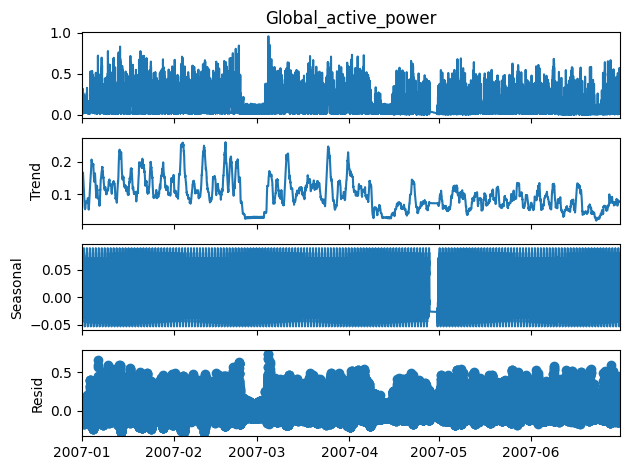

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Selecione um período de 6 meses para a análise (ajuste as datas conforme necessário)
start_date = '2007-01-01'
end_date = '2007-06-30'
df_subset = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)].copy()

# Crie um índice de data/hora para a série temporal
df_subset['DateTime'] = pd.to_datetime(df_subset['Date'].astype(str) + ' ' + df_subset['Time'])
df_subset.set_index('DateTime', inplace=True)

# Remova as linhas com valores ausentes na coluna 'Global_active_power'
df_subset.dropna(subset=['Global_active_power'], inplace=True)

# Realize a decomposição aditiva
# Assumindo que a frequência dos dados é diária para este exemplo.
# Você pode precisar ajustar a frequência (period) se for diferente.
decomposition = seasonal_decompose(df_subset['Global_active_power'], model='additive', period=24*60) # 24 horas * 60 minutos = 1440 minutos em um dia

# Plote a decomposição
fig = decomposition.plot()
plt.show()

20. Treine um modelo de regressão linear simples para prever Global_active_power a partir de Global_intensity. Avalie o erro do modelo.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Preparar os dados
# Remover linhas com valores ausentes em ambas as colunas
df_reg = df.dropna(subset=['Global_active_power', 'Global_intensity']).copy()

X = df_reg[['Global_intensity']] # Variável preditora
y = df_reg['Global_active_power'] # Variável alvo

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Erro Quadrático Médio (MSE): {mse}')
print(f'R-quadrado (R2): {r2}')

Erro Quadrático Médio (MSE): 2.0125188629674842e-05
R-quadrado (R2): 0.9978152308016333


## PARTE 2 – Exercícios adicionais no dataset inicial

21. Séries temporais por hora
- Converta Date e Time em índice datetime.
- Reamostre os dados em intervalos de 1 hora, calculando a média de Global_active_power.
- Identifique os horários de maior consumo médio ao longo do dia.

Observação: uma série temporal é um conjunto de dados registrados em ordem cronológica, útil
para identificar padrões de comportamento ao longo do tempo.

In [30]:
# Converta Date e Time em índice datetime.
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'])
df.set_index('DateTime', inplace=True)

# Reamostre os dados em intervalos de 1 hora, calculando a média de Global_active_power.
df_hourly = df['Global_active_power'].resample('H').mean()

# Identifique os horários de maior consumo médio ao longo do dia.
horarios_maior_consumo = df_hourly.groupby(df_hourly.index.time).mean().sort_values(ascending=False)

print("Horários de maior consumo médio de Global_active_power:")
print(horarios_maior_consumo.head())

Horários de maior consumo médio de Global_active_power:
20:00:00    0.165044
21:00:00    0.162961
19:00:00    0.150048
07:00:00    0.129130
08:00:00    0.125379
Name: Global_active_power, dtype: float64


/tmp/ipython-input-253846886.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df['Global_active_power'].resample('H').mean()


22. Autocorrelação do consumo
- Use a série temporal de Global_active_power.
- Calcule a autocorrelação em lags de 1h, 24h e 48h.
- Pergunta: existem padrões repetidos diariamente?

In [31]:
# Calcule a autocorrelação para lags de 1h, 24h e 48h
autocorr_1h = df_hourly.autocorr(lag=1)
autocorr_24h = df_hourly.autocorr(lag=24)
autocorr_48h = df_hourly.autocorr(lag=48)

print(f'Autocorrelação (Lag 1 hora): {autocorr_1h}')
print(f'Autocorrelação (Lag 24 horas): {autocorr_24h}')
print(f'Autocorrelação (Lag 48 horas): {autocorr_48h}')

Autocorrelação (Lag 1 hora): 0.713455594691645
Autocorrelação (Lag 24 horas): 0.43590722591199127
Autocorrelação (Lag 48 horas): 0.4012692620450157


Sim. A autocorrelação em 1 hora é relativamente alta, o que indica que o consumo de energia em uma hora está fortemente relacionado ao consumo da hora anterior. Isso é esperado em séries temporais de consumo de energia.

A autocorrelação em 24 horas e 48 horas também são positivas, embora menores que a de 1 hora. Isso sugere que há, sim, padrões que se repetem diariamente e, em menor grau, a cada dois dias.

23. Redução de dimensionalidade com PCA
- Selecione Global_active_power, Global_reactive_power, Voltage e Global_intensity.
- Aplique PCA para reduzir para 2 componentes principais.
- Analise a variância explicada por cada componente.


In [32]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Selecione as variáveis para o PCA
features = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
df_pca = df[features].copy()

# Remova linhas com valores ausentes (PCA não lida com NaNs)
df_pca.dropna(inplace=True)

# Padronize os dados (PCA é sensível à escala das variáveis)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_pca)

# Aplique PCA para reduzir para 2 componentes principais
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Crie um DataFrame com os componentes principais
df_principal_components = pd.DataFrame(data = principal_components, columns = ['principal_component_1', 'principal_component_2'])

# Analise a variância explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_

print("Variância explicada por cada componente principal:")
print(f"Componente Principal 1: {explained_variance_ratio[0]:.4f}")
print(f"Componente Principal 2: {explained_variance_ratio[1]:.4f}")
print(f"Variância total explicada: {explained_variance_ratio.sum():.4f}")

Variância explicada por cada componente principal:
Componente Principal 1: 0.5910
Componente Principal 2: 0.2272
Variância total explicada: 0.8182


24. Visualização de clusters no espaço PCA
- Combine os resultados do PCA com K-Means (3 clusters).
- Plote os pontos resultantes e pinte cada grupo por cluster.
- Pergunta: os grupos se separam de forma clara?


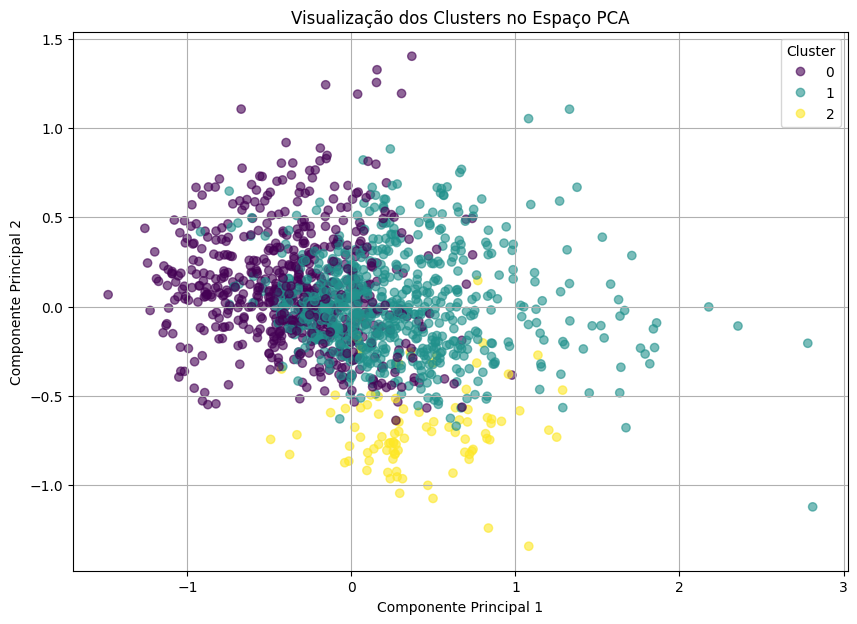

In [34]:
import matplotlib.pyplot as plt

# Certifique-se de que o índice dos componentes principais corresponde ao índice dos clusters diários
# Como PCA foi aplicado aos dados normalizados após remover NaNs, precisamos alinhar com o df_daily
# que também removeu NaNs e foi agrupado por data.
# Vamos resetar o índice de df_pca_cleaned para alinhar com df_daily após o dropna
df_pca_cleaned = df[features].dropna().copy()
df_pca_cleaned['principal_component_1'] = principal_components[:, 0]
df_pca_cleaned['principal_component_2'] = principal_components[:, 1]

# Agrupar os componentes principais pela data para corresponder ao df_daily
df_pca_daily = df_pca_cleaned.groupby(df_pca_cleaned.index.date)[['principal_component_1', 'principal_component_2']].mean()
df_pca_daily.index = pd.to_datetime(df_pca_daily.index) # Convert index to datetime

# Resetar o índice de df_daily para mesclar
df_daily_reset = df_daily.reset_index()
df_daily_reset['Date'] = pd.to_datetime(df_daily_reset['Date'])

# Mesclar os resultados do PCA diário com os clusters diários
df_clustered_pca = pd.merge(df_pca_daily, df_daily_reset[['Date', 'Cluster']], left_index=True, right_on='Date')

# Plotar os clusters no espaço PCA
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df_clustered_pca['principal_component_1'], df_clustered_pca['principal_component_2'], c=df_clustered_pca['Cluster'], cmap='viridis', alpha=0.6)
plt.title('Visualização dos Clusters no Espaço PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
legend = plt.legend(*scatter.legend_elements(), title="Cluster")
plt.grid(True)
plt.show()

Não, os grupos não se separam de forma clara

25. Regressão polinomial vs linear
- Modele Global_active_power em função de Voltage.
- Compare Regressão Linear Simples com Regressão Polinomial (grau 2).
- Analise RMSE e a curva ajustada.

In [35]:
# 1. Preparar os dados
# Selecionar as colunas Global_active_power e Voltage
df_reg_poly = df[['Global_active_power', 'Voltage']].copy()

# Remover linhas com valores ausentes
df_reg_poly.dropna(inplace=True)

display(df_reg_poly.head())

,Global_active_power,Voltage
DateTime,,
2006-12-16 17:24:00,0.374796,0.376090
2006-12-16 17:25:00,0.478363,0.336995
2006-12-16 17:26:00,0.479631,0.326010
2006-12-16 17:27:00,0.480898,0.340549
2006-12-16 17:28:00,0.325005,0.403231


In [36]:
# 2. Dividir os dados
from sklearn.model_selection import train_test_split

X = df_reg_poly[['Voltage']] # Variável preditora
y = df_reg_poly['Global_active_power'] # Variável alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamanho do conjunto de treino: {len(X_train)}")
print(f"Tamanho do conjunto de teste: {len(X_test)}")

Tamanho do conjunto de treino: 1639424
Tamanho do conjunto de teste: 409856


In [38]:
# 3. Treinar modelo de regressão linear
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np # Import numpy

model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

# Avaliar o modelo linear
y_pred_linear = model_linear.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear) # Calculate RMSE manually
r2_linear = r2_score(y_test, y_pred_linear)

print("Resultados da Regressão Linear Simples:")
print(f"Erro Quadrático Médio (MSE): {mse_linear}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse_linear}")
print(f"R-quadrado (R2): {r2_linear}")

Resultados da Regressão Linear Simples:
Erro Quadrático Médio (MSE): 0.0077423974772478235
Raiz do Erro Quadrático Médio (RMSE): 0.08799089428598747
R-quadrado (R2): 0.15949351625644748


In [40]:
# 4. Treinar modelo de regressão polinomial (grau 2)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np # Import numpy

# Criar features polinomiais de grau 2
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Treinar o modelo de regressão linear com features polinomiais
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Avaliar o modelo polinomial
y_pred_poly = model_poly.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly) # Calculate RMSE manually
r2_poly = r2_score(y_test, y_pred_poly)

print("\nResultados da Regressão Polinomial (Grau 2):")
print(f"Erro Quadrático Médio (MSE): {mse_poly}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse_poly}")
print(f"R-quadrado (R2): {r2_poly}")


Resultados da Regressão Polinomial (Grau 2):
Erro Quadrático Médio (MSE): 0.0076705731057481455
Raiz do Erro Quadrático Médio (RMSE): 0.08758180807535401
R-quadrado (R2): 0.16729069408330122


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


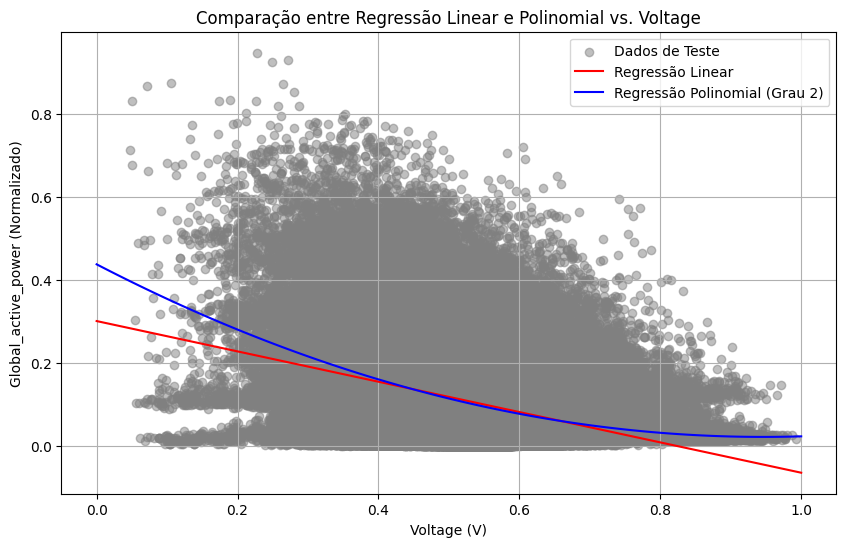

In [41]:
# 6. Visualizar os resultados
import matplotlib.pyplot as plt
import numpy as np

# Crie um array de valores de Voltage para plotar as curvas ajustadas
voltage_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# Previsões dos modelos para a visualização
voltage_range_poly = poly_features.transform(voltage_range)
predicted_linear = model_linear.predict(voltage_range)
predicted_poly = model_poly.predict(voltage_range_poly)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='gray', label='Dados de Teste', alpha=0.5)
plt.plot(voltage_range, predicted_linear, color='red', label='Regressão Linear')
plt.plot(voltage_range, predicted_poly, color='blue', label='Regressão Polinomial (Grau 2)')
plt.title('Comparação entre Regressão Linear e Polinomial vs. Voltage')
plt.xlabel('Voltage (V)')
plt.ylabel('Global_active_power (Normalizado)')
plt.legend()
plt.grid(True)
plt.show()

7. **Análise e comparação:**

Com base nos resultados do RMSE e no gráfico gerado, podemos comparar o desempenho dos dois modelos:

*   **RMSE:** O modelo com o menor RMSE geralmente tem um ajuste melhor aos dados.
*   **Visualização:** O gráfico mostra como cada curva de regressão se ajusta aos pontos de dados. Uma curva que segue mais de perto a tendência dos dados indica um modelo melhor.

## PARTE 3 – Novo dataset Appliances Energy Prediction

Dataset escolhido:
https://archive.ics.uci.edu/dataset/374/appliances+energy+prediction

26. Carregamento e inspeção inicial
- Carregue o dataset no Pandas.
- Liste tipos de dados e estatísticas descritivas (.info() e .describe()).

In [44]:
import pandas as pd

df_energy = pd.read_csv('/content/energydata_complete.csv')
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [45]:
df_energy.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


27. Distribuição do consumo
- Crie histogramas e séries temporais para a variável Appliances.
- Pergunta: o consumo tende a se concentrar em valores baixos ou altos?

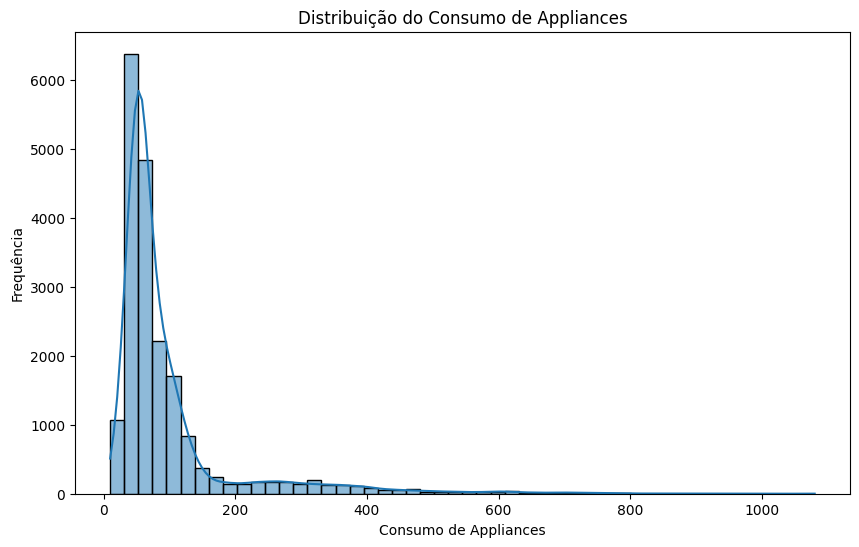

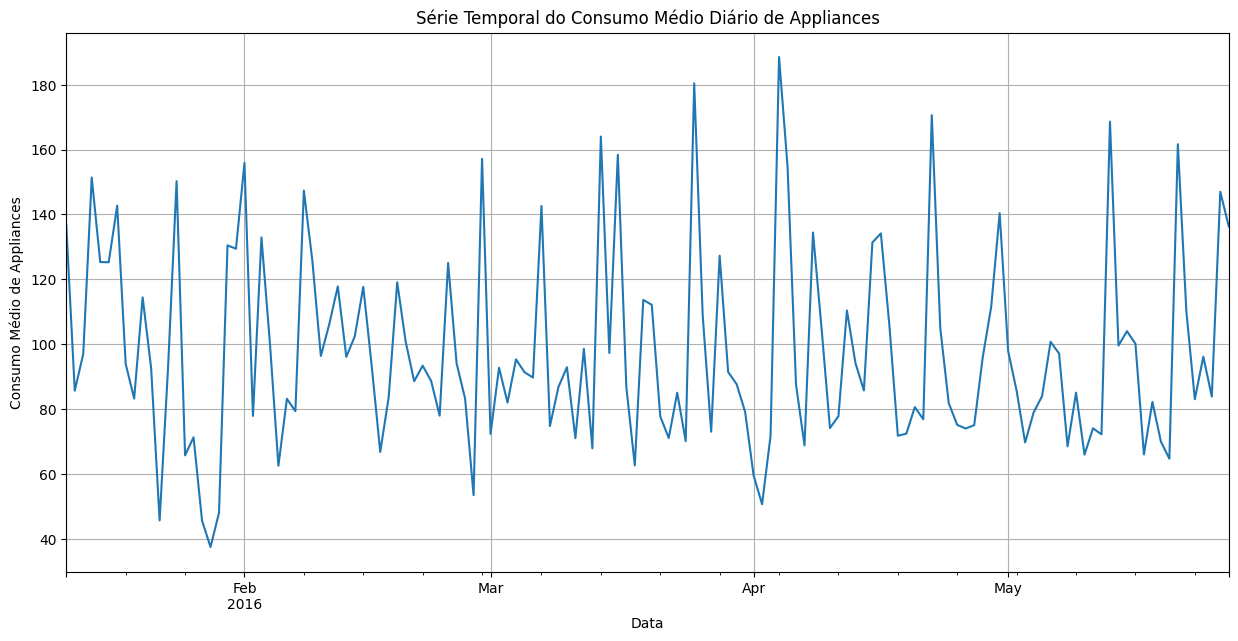

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma da variável Appliances
plt.figure(figsize=(10, 6))
sns.histplot(df_energy['Appliances'], bins=50, kde=True)
plt.title('Distribuição do Consumo de Appliances')
plt.xlabel('Consumo de Appliances')
plt.ylabel('Frequência')
plt.show()

# Série temporal da variável Appliances (amostra para melhor visualização)
# Converter a coluna 'date' para datetime e definir como índice
df_energy['date'] = pd.to_datetime(df_energy['date'])
df_energy.set_index('date', inplace=True)

# Reamostrar os dados para um intervalo maior (ex: diário ou horário) se o dataset for muito grande
# Para este exemplo, vou reamostrar para a média diária para uma visualização mais clara da série temporal
df_daily_appliances = df_energy['Appliances'].resample('D').mean()

plt.figure(figsize=(15, 7))
df_daily_appliances.plot()
plt.title('Série Temporal do Consumo Médio Diário de Appliances')
plt.xlabel('Data')
plt.ylabel('Consumo Médio de Appliances')
plt.grid(True)
plt.show()

Observando o histograma para a variável Appliances, podemos ver que a maior frequência de dados está concentrada nos valores mais baixos de consumo.

28. Correlações com variáveis ambientais
- Calcule correlações entre Appliances e variáveis como temperatura e umidade.
- Pergunta: quais fatores têm mais relação com o consumo?


In [47]:
# Selecionar as variáveis relevantes (Appliances, temperaturas e umidades)
environmental_vars = ['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'RH_out', 'Tdewpoint']

# Calcular a matriz de correlação
correlation_matrix = df_energy[environmental_vars].corr()

# Exibir as correlações com a variável 'Appliances'
print("Correlações com a variável 'Appliances':")
print(correlation_matrix['Appliances'].sort_values(ascending=False))

Correlações com a variável 'Appliances':
Appliances    1.000000
T2            0.120073
T6            0.117638
T_out         0.099155
RH_1          0.086031
T3            0.085060
T1            0.055447
T4            0.040281
T8            0.039572
RH_3          0.036292
T7            0.025801
T5            0.019760
RH_4          0.016965
Tdewpoint     0.015353
T9            0.010010
RH_5          0.006955
RH_9         -0.051462
RH_7         -0.055642
RH_2         -0.060465
RH_6         -0.083178
RH_8         -0.094039
RH_out       -0.152282
Name: Appliances, dtype: float64


`T2`, `T6` e `RH_out` são as variáveis ambientais que mostram a relação linear mais forte com o consumo de `Appliances` neste conjunto de dados.

29. Normalização dos dados
- Aplique Min-Max Scaling às variáveis numéricas.
- Reutilize esses dados em modelos posteriores.

In [49]:
from sklearn.preprocessing import MinMaxScaler

# Selecionar as colunas numéricas para normalizar
numerical_cols = df_energy.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Inicializar o MinMaxScaler
scaler = MinMaxScaler()

# Aplicar Min-Max scaling às colunas selecionadas
df_energy[numerical_cols] = scaler.fit_transform(df_energy[numerical_cols])

display(df_energy.head())

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,0.046729,0.428571,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
2016-01-11 17:10:00,0.046729,0.428571,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2016-01-11 17:20:00,0.037383,0.428571,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
2016-01-11 17:30:00,0.037383,0.571429,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
2016-01-11 17:40:00,0.046729,0.571429,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


30. PCA
- Aplique PCA e reduza para 2 componentes principais.
- Plote os dados resultantes.
- Pergunta: aparecem padrões ou agrupamentos naturais?

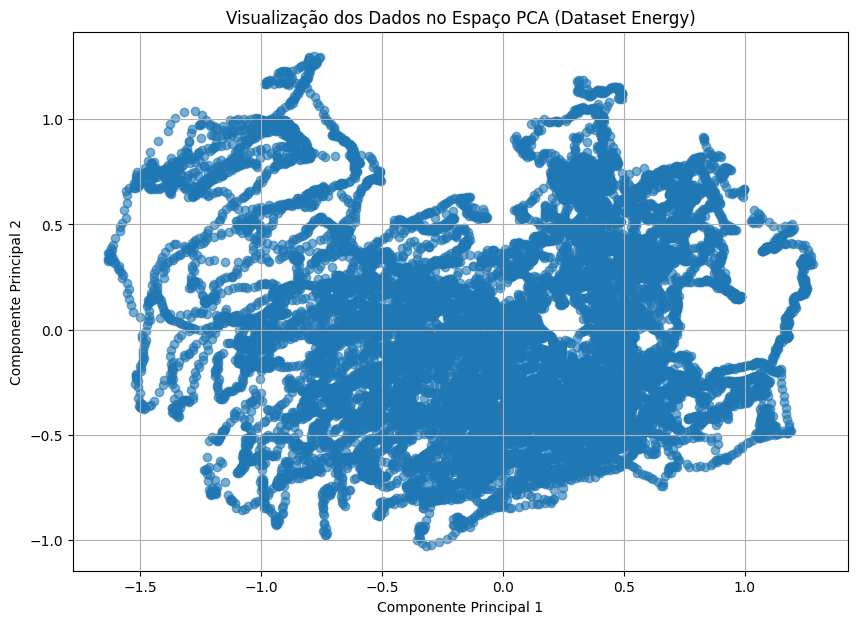


Variância explicada por cada componente principal:
Componente Principal 1: 0.3643
Componente Principal 2: 0.2110
Variância total explicada: 0.5753


In [50]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Selecionar as variáveis numéricas (já normalizadas) para o PCA
# Excluímos a coluna 'Appliances' pois é a variável alvo em alguns contextos
features_pca_energy = df_energy.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'Appliances' in features_pca_energy:
    features_pca_energy.remove('Appliances')

df_energy_pca_data = df_energy[features_pca_energy]

# Aplicar PCA para reduzir para 2 componentes principais
pca_energy = PCA(n_components=2)
principal_components_energy = pca_energy.fit_transform(df_energy_pca_data)

# Crie um DataFrame com os componentes principais
df_principal_components_energy = pd.DataFrame(data = principal_components_energy, columns = ['principal_component_1', 'principal_component_2'])

# Plote os dados resultantes no espaço PCA
plt.figure(figsize=(10, 7))
plt.scatter(df_principal_components_energy['principal_component_1'], df_principal_components_energy['principal_component_2'], alpha=0.6)
plt.title('Visualização dos Dados no Espaço PCA (Dataset Energy)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

# Opcional: Analisar a variância explicada
explained_variance_ratio_energy = pca_energy.explained_variance_ratio_
print("\nVariância explicada por cada componente principal:")
print(f"Componente Principal 1: {explained_variance_ratio_energy[0]:.4f}")
print(f"Componente Principal 2: {explained_variance_ratio_energy[1]:.4f}")
print(f"Variância total explicada: {explained_variance_ratio_energy.sum():.4f}")

Não parece haver agrupamentos distintos ou padrões naturais claros que saltem à vista. Os pontos estão mais dispersos, formando uma nuvem de pontos sem separações óbvias em grupos bem definidos.

31. Regressão Linear Múltipla
- Modele Appliances em função das variáveis ambientais.
- Avalie R² e erro médio.

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Selecionar as variáveis ambientais como preditoras e 'Appliances' como alvo
environmental_vars = ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'Press_mm_hg'] # Excluímos 'rv1' e 'rv2' que são aleatórias

X_energy = df_energy[environmental_vars]
y_energy = df_energy['Appliances']

# Remover linhas com valores ausentes (se houver) - embora tenhamos normalizado, é bom garantir
X_energy = X_energy.dropna()
y_energy = y_energy[X_energy.index] # Alinhar y com o X após remover NaNs

# Dividir os dados em conjuntos de treino e teste
X_train_energy, X_test_energy, y_train_energy, y_test_energy = train_test_split(X_energy, y_energy, test_size=0.2, random_state=42)

# Treinar o modelo de regressão linear múltipla
model_multi_linear = LinearRegression()
model_multi_linear.fit(X_train_energy, y_train_energy)

# Fazer previsões no conjunto de teste
y_pred_energy = model_multi_linear.predict(X_test_energy)

# Avaliar o modelo
mse_energy = mean_squared_error(y_test_energy, y_pred_energy)
rmse_energy = np.sqrt(mse_energy)
r2_energy = r2_score(y_test_energy, y_pred_energy)

print("Resultados da Regressão Linear Múltipla:")
print(f"Erro Quadrático Médio (MSE): {mse_energy:.4f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse_energy:.4f}")
print(f"R-quadrado (R2): {r2_energy:.4f}")

# Cálculo do erro médio (Mean Absolute Error - MAE) também é útil
from sklearn.metrics import mean_absolute_error
mae_energy = mean_absolute_error(y_test_energy, y_pred_energy)
print(f"Erro Médio Absoluto (MAE): {mae_energy:.4f}")

Resultados da Regressão Linear Múltipla:
Erro Quadrático Médio (MSE): 0.0075
Raiz do Erro Quadrático Médio (RMSE): 0.0864
R-quadrado (R2): 0.1459
Erro Médio Absoluto (MAE): 0.0499


32. Random Forest Regressor
- Treine um modelo de Random Forest para prever Appliances.
- Compare o RMSE com a regressão linear

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Treinar o modelo Random Forest Regressor
# Você pode ajustar n_estimators (número de árvores) e outros parâmetros se necessário
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train_energy, y_train_energy)

# Fazer previsões no conjunto de teste
y_pred_rf = model_rf.predict(X_test_energy)

# Avaliar o modelo Random Forest
mse_rf = mean_squared_error(y_test_energy, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print("Resultados do Random Forest Regressor:")
print(f"Erro Quadrático Médio (MSE): {mse_rf:.4f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse_rf:.4f}")

# Comparar RMSE com a Regressão Linear Múltipla (usando o valor calculado anteriormente)
print("\nComparação de RMSE:")
print(f"RMSE Regressão Linear Múltipla: {rmse_energy:.4f}")
print(f"RMSE Random Forest Regressor: {rmse_rf:.4f}")

if rmse_rf < rmse_energy:
    print("O modelo Random Forest Regressor teve um RMSE menor, indicando um desempenho possivelmente melhor.")
elif rmse_rf > rmse_energy:
    print("O modelo de Regressão Linear Múltipla teve um RMSE menor, indicando um desempenho possivelmente melhor.")
else:
    print("Os modelos tiveram um desempenho de RMSE semelhante.")

Resultados do Random Forest Regressor:
Erro Quadrático Médio (MSE): 0.0035
Raiz do Erro Quadrático Médio (RMSE): 0.0588

Comparação de RMSE:
RMSE Regressão Linear Múltipla: 0.0864
RMSE Random Forest Regressor: 0.0588
O modelo Random Forest Regressor teve um RMSE menor, indicando um desempenho possivelmente melhor.


33. K-Means clustering
- Aplique K-Means com 3 a 5 clusters.
- Interprete os perfis de consumo.

In [54]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecionar as variáveis para o clustering (excluindo 'Appliances' e variáveis não numéricas/aleatórias)
# Usaremos as variáveis ambientais que já foram normalizadas
clustering_vars = ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'Press_mm_hg']
df_clustering = df_energy[clustering_vars].dropna()

# Vamos experimentar com 3, 4 e 5 clusters
n_clusters_list = [3, 4, 5]

for n_clusters in n_clusters_list:
    print(f"\nAplicando K-Means com {n_clusters} clusters:")
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    df_clustering[f'Cluster_{n_clusters}'] = kmeans.fit_predict(df_clustering)

    print(f"\nCaracterísticas médias dos clusters ({n_clusters} clusters):")
    display(df_clustering.groupby(f'Cluster_{n_clusters}')[clustering_vars].mean())


Aplicando K-Means com 3 clusters:

Características médias dos clusters (3 clusters):


,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T8,RH_8,T9,RH_9,T_out,RH_out,Windspeed,Visibility,Tdewpoint,Press_mm_hg
Cluster_3,,,,,,,,,,,,,,,,,,,,,
0,0.690705,0.391659,0.473839,0.554091,0.602902,0.471624,0.718529,0.498419,0.598491,0.300754,...,0.691747,0.440418,0.715942,0.518090,0.583151,0.599717,0.268040,0.553734,0.622306,0.585359
1,0.443805,0.296868,0.208481,0.529565,0.348493,0.402322,0.452963,0.362090,0.333458,0.292361,...,0.495355,0.360309,0.410385,0.410880,0.285288,0.766507,0.231026,0.580474,0.339479,0.641755
2,0.428952,0.455638,0.280824,0.629961,0.320878,0.677521,0.381466,0.699779,0.297321,0.387854,...,0.358956,0.660971,0.296484,0.697398,0.373826,0.845792,0.423701,0.589538,0.512633,0.581526



Aplicando K-Means com 4 clusters:

Características médias dos clusters (4 clusters):


,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T8,RH_8,T9,RH_9,T_out,RH_out,Windspeed,Visibility,Tdewpoint,Press_mm_hg
Cluster_4,,,,,,,,,,,,,,,,,,,,,
0,0.443805,0.296868,0.208481,0.529565,0.348493,0.402322,0.452963,0.362090,0.333458,0.292361,...,0.495355,0.360309,0.410385,0.410880,0.285288,0.766507,0.231026,0.580474,0.339479,0.641755
1,0.650057,0.326000,0.463321,0.471216,0.545242,0.400643,0.675776,0.402368,0.543776,0.272213,...,0.652880,0.336170,0.653344,0.418816,0.570879,0.493088,0.302631,0.564605,0.526246,0.619337
2,0.428952,0.455638,0.280824,0.629961,0.320878,0.677521,0.381466,0.699779,0.297321,0.387854,...,0.358956,0.660971,0.296484,0.697398,0.373826,0.845792,0.423701,0.589538,0.512633,0.581526
3,0.753001,0.492288,0.489960,0.681105,0.691273,0.580408,0.784053,0.645627,0.682347,0.344496,...,0.751315,0.600186,0.811879,0.670236,0.601958,0.763137,0.215027,0.537074,0.769527,0.533285



Aplicando K-Means com 5 clusters:

Características médias dos clusters (5 clusters):


,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T8,RH_8,T9,RH_9,T_out,RH_out,Windspeed,Visibility,Tdewpoint,Press_mm_hg
Cluster_5,,,,,,,,,,,,,,,,,,,,,
0,0.428952,0.455638,0.280824,0.629961,0.320878,0.677521,0.381466,0.699779,0.297321,0.387854,...,0.358956,0.660971,0.296484,0.697398,0.373826,0.845792,0.423701,0.589538,0.512633,0.581526
1,0.497044,0.293855,0.233781,0.539891,0.409530,0.374768,0.506980,0.355508,0.387602,0.268558,...,0.562500,0.336723,0.491703,0.409384,0.344315,0.737143,0.245709,0.564561,0.401757,0.670673
2,0.650057,0.326000,0.463321,0.471216,0.545242,0.400643,0.675776,0.402368,0.543776,0.272213,...,0.652880,0.336170,0.653344,0.418816,0.570879,0.493088,0.302631,0.564605,0.526246,0.619337
3,0.753001,0.492288,0.489960,0.681105,0.691273,0.580408,0.784053,0.645627,0.682347,0.344496,...,0.751315,0.600186,0.811879,0.670236,0.601958,0.763137,0.215027,0.537074,0.769527,0.533285
4,0.372526,0.300902,0.174607,0.515740,0.266774,0.439212,0.380641,0.370903,0.260967,0.324231,...,0.405456,0.391888,0.301511,0.412883,0.206261,0.805823,0.211368,0.601778,0.256098,0.603037


34. Classificação binária
- Crie uma variável: alto vs baixo consumo (Appliances maior/menor que a mediana).
- Treine Logistic Regression e Random Forest Classifier.


**Criar a variável alvo binária**

Calcular a mediana da coluna `Appliances` e criar uma nova coluna binária ('Consumo_Binario') onde 1 indica consumo alto (>= mediana) e 0 indica consumo baixo (< mediana).


In [55]:
median_appliances = df_energy['Appliances'].median()
df_energy['Consumo_Binario'] = (df_energy['Appliances'] >= median_appliances).astype(int)
display(df_energy.head())

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Consumo_Binario
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,0.046729,0.428571,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,...,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449,1
2016-01-11 17:10:00,0.046729,0.428571,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,...,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083,1
2016-01-11 17:20:00,0.037383,0.428571,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,...,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848,0
2016-01-11 17:30:00,0.037383,0.571429,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,...,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261,0
2016-01-11 17:40:00,0.046729,0.571429,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,...,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611,1


**Preparar os dados**

Selecionar as variáveis preditoras (variáveis ambientais) e a nova variável alvo binária. Remover linhas com valores ausentes.


In [56]:
# Selecionar as variáveis ambientais como preditoras
environmental_vars_classification = ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'Press_mm_hg']

X_energy_classification = df_energy[environmental_vars_classification]
y_energy_classification = df_energy['Consumo_Binario']

# Remover linhas com valores ausentes em X_energy_classification
X_energy_classification = X_energy_classification.dropna()

# Alinhar y_energy_classification com o índice de X_energy_classification
y_energy_classification = y_energy_classification[X_energy_classification.index]

print("Shape of X_energy_classification after dropping NaNs:", X_energy_classification.shape)
print("Shape of y_energy_classification after aligning:", y_energy_classification.shape)
display(X_energy_classification.head())
display(y_energy_classification.head())

Shape of X_energy_classification after dropping NaNs: (19735, 24)
Shape of y_energy_classification after aligning: (19735,)


,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T8,RH_8,T9,RH_9,T_out,RH_out,Windspeed,Visibility,Tdewpoint,Press_mm_hg
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,0.381691,...,0.173329,0.661412,0.223032,0.677290,0.372990,0.894737,0.500000,0.953846,0.538462,0.097674
2016-01-11 17:10:00,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,0.381691,...,0.173329,0.660155,0.226500,0.678532,0.369239,0.894737,0.476190,0.894872,0.533937,0.100000
2016-01-11 17:20:00,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,0.380037,...,0.173329,0.655586,0.219563,0.676049,0.365488,0.894737,0.452381,0.835897,0.529412,0.102326
2016-01-11 17:30:00,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,0.380037,...,0.164175,0.650788,0.219563,0.671909,0.361736,0.894737,0.428571,0.776923,0.524887,0.104651
2016-01-11 17:40:00,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,0.380037,...,0.164175,0.650788,0.219563,0.671909,0.357985,0.894737,0.404762,0.717949,0.520362,0.106977


,Consumo_Binario
date,
2016-01-11 17:00:00,1
2016-01-11 17:10:00,1
2016-01-11 17:20:00,0
2016-01-11 17:30:00,0
2016-01-11 17:40:00,1


**Dividir os dados**

Separar os dados em conjuntos de treino e teste.


In [57]:
from sklearn.model_selection import train_test_split

X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(X_energy_classification, y_energy_classification, test_size=0.2, random_state=42)

print("Shape of X_train_classification:", X_train_classification.shape)
print("Shape of X_test_classification:", X_test_classification.shape)
print("Shape of y_train_classification:", y_train_classification.shape)
print("Shape of y_test_classification:", y_test_classification.shape)

Shape of X_train_classification: (15788, 24)
Shape of X_test_classification: (3947, 24)
Shape of y_train_classification: (15788,)
Shape of y_test_classification: (3947,)


**Treinar modelo de regressão logística**

Treinar um modelo de Regressão Logística usando os dados de treino.


In [58]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_classification, y_train_classification)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


**Treinar modelo de random forest classifier**

Treinar um modelo de Random Forest Classifier usando os dados de treino.


In [59]:
from sklearn.ensemble import RandomForestClassifier

model_rf_classifier = RandomForestClassifier(random_state=42)
model_rf_classifier.fit(X_train_classification, y_train_classification)

print("Random Forest Classifier model trained successfully.")

Random Forest Classifier model trained successfully.


**Avaliar os modelos**

Avaliar o desempenho de ambos os modelos de classificação usando métricas apropriadas (por exemplo, Acurácia, Precisão, Recall, F1-score) nos dados de teste.


In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test data using the Logistic Regression model
y_pred_lr = model_lr.predict(X_test_classification)

# Calculate and print evaluation metrics for the Logistic Regression model
print("Metrics for Logistic Regression Model:")
print(f"Accuracy: {accuracy_score(y_test_classification, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test_classification, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test_classification, y_pred_lr):.4f}")
print(f"F1-score: {f1_score(y_test_classification, y_pred_lr):.4f}")

# Make predictions on the test data using the Random Forest Classifier model
y_pred_rf = model_rf_classifier.predict(X_test_classification)

# Calculate and print evaluation metrics for the Random Forest Classifier model
print("\nMetrics for Random Forest Classifier Model:")
print(f"Accuracy: {accuracy_score(y_test_classification, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test_classification, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test_classification, y_pred_rf):.4f}")
print(f"F1-score: {f1_score(y_test_classification, y_pred_rf):.4f}")

Metrics for Logistic Regression Model:
Accuracy: 0.7198
Precision: 0.7490
Recall: 0.8221
F1-score: 0.7838

Metrics for Random Forest Classifier Model:
Accuracy: 0.8310
Precision: 0.8541
Recall: 0.8762
F1-score: 0.8650


35. Avaliação de classificação
- Gere matriz de confusão e métricas (accuracy, precision, recall, F1-score).
- Pergunta: o modelo erra mais para alto ou para baixo consumo?

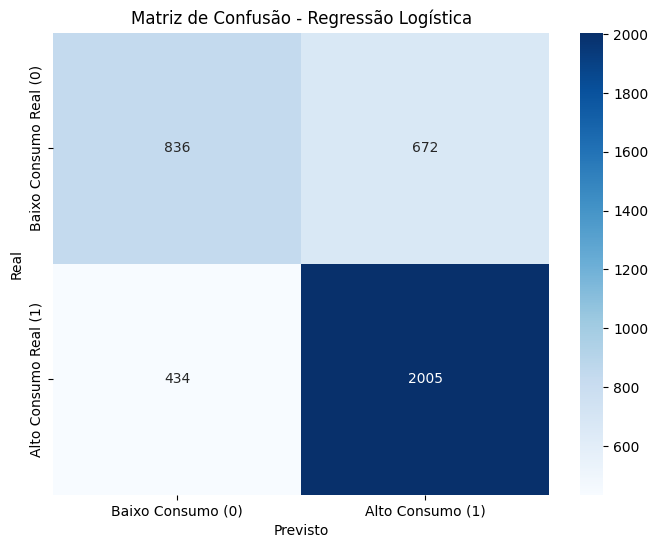

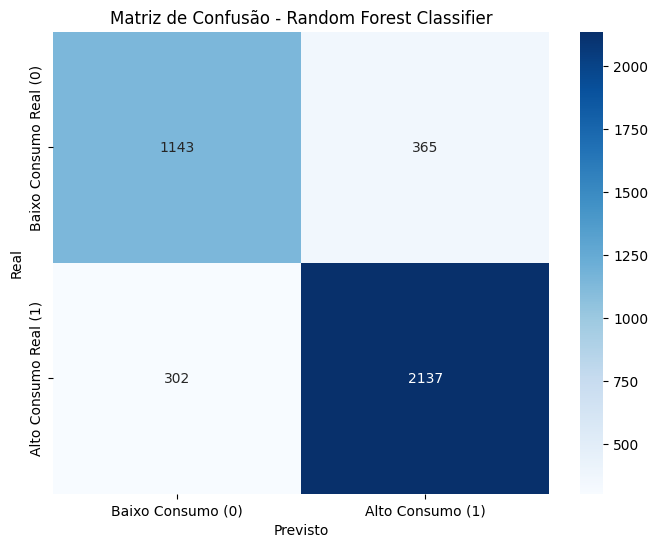

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de Confusão para o modelo de Regressão Logística
cm_lr = confusion_matrix(y_test_classification, y_pred_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Baixo Consumo (0)', 'Alto Consumo (1)'], yticklabels=['Baixo Consumo Real (0)', 'Alto Consumo Real (1)'])
plt.title('Matriz de Confusão - Regressão Logística')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

# Matriz de Confusão para o modelo Random Forest Classifier
cm_rf = confusion_matrix(y_test_classification, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Baixo Consumo (0)', 'Alto Consumo (1)'], yticklabels=['Baixo Consumo Real (0)', 'Alto Consumo Real (1)'])
plt.title('Matriz de Confusão - Random Forest Classifier')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

Observando as matrizes de confusão e as métricas calculadas na célula anterior (Acurácia, Precisão, Recall, F1-score):

*   **Matriz de Confusão:**
    *   A diagonal principal (superior esquerda e inferior direita) mostra o número de previsões corretas.
    *   Os elementos fora da diagonal principal mostram os erros:
        *   Canto superior direito: Falsos Positivos (previsto como alto consumo, mas é baixo consumo real).
        *   Canto inferior esquerdo: Falsos Negativos (previsto como baixo consumo, mas é alto consumo real).

*   **Análise dos Erros:**
    *   Compare os números de Falsos Positivos e Falsos Negativos entre os dois modelos.
    *   Um número maior de Falsos Positivos significa que o modelo tende a prever alto consumo incorretamente.
    *   Um número maior de Falsos Negativos significa que o modelo tende a prever baixo consumo incorretamente quando o consumo real é alto.

Com base nessas observações e nas métricas, podemos determinar qual modelo teve um desempenho geral melhor e onde cada um tende a errar mais (classificando incorretamente alto consumo como baixo, ou vice-versa).

Pelas métricas calculadas (Accuracy, Precision, Recall, F1-score), o modelo Random Forest Classifier apresentou métricas superiores em comparação com a Regressão Logística, indicando um melhor desempenho geral na classificação. Analise as matrizes de confusão para ver o breakdown dos acertos e erros de cada modelo.